In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

filepath = 'ny.csv'

data = pd.read_csv(filepath)

#pandas is a library to organize data into DataFrame objects, which have lots of useful methods
# it allows us to process our data more efficiently

pd.set_option('display.max_columns', None)
data.head(5)

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,SLP_ATTRIBUTES,STP,STP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,72055399999,2020-01-01,40.701214,-74.009028,2.13,"PORT AUTH DOWNTN MANHATTAN WALL ST HEL, NY US",39.6,24,26.9,24,1006.7,24,999.9,0,999.9,0,9.7,24,17.1,21.0,46.0,,37.0,,0.06,G,999.9,0
1,72055399999,2020-01-02,40.701214,-74.009028,2.13,"PORT AUTH DOWNTN MANHATTAN WALL ST HEL, NY US",39.0,24,25.8,24,1014.0,24,999.9,0,999.9,0,6.7,24,12.0,39.0,48.9,,33.1,,0.04,B,999.9,0
2,72055399999,2020-01-03,40.701214,-74.009028,2.13,"PORT AUTH DOWNTN MANHATTAN WALL ST HEL, NY US",45.4,24,39.0,24,1010.5,20,999.9,0,999.9,0,4.7,24,7.0,999.9,48.9,,33.1,,0.02,B,999.9,0
3,72055399999,2020-01-04,40.701214,-74.009028,2.13,"PORT AUTH DOWNTN MANHATTAN WALL ST HEL, NY US",46.9,24,45.5,24,1005.5,19,999.9,0,999.9,0,3.5,24,6.0,999.9,48.9,,44.1,,0.16,G,999.9,0
4,72055399999,2020-01-05,40.701214,-74.009028,2.13,"PORT AUTH DOWNTN MANHATTAN WALL ST HEL, NY US",41.8,24,27.6,24,1007.6,24,999.9,0,999.9,0,4.0,24,8.0,35.0,50.0,,37.9,,0.00,G,999.9,0


In [77]:
data_clean = data.drop(['STATION', 'LATITUDE','LONGITUDE','NAME', 'TEMP_ATTRIBUTES', 'DEWP_ATTRIBUTES','SLP_ATTRIBUTES','STP_ATTRIBUTES','VISIB_ATTRIBUTES','WDSP_ATTRIBUTES','MAX_ATTRIBUTES','MIN_ATTRIBUTES','PRCP_ATTRIBUTES'], axis=1)
data_clean.head(5)

,DATE,ELEVATION,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
0,2020-01-01,2.13,39.6,26.9,1006.7,999.9,999.9,9.7,17.1,21.0,46.0,37.0,0.06,999.9,0
1,2020-01-02,2.13,39.0,25.8,1014.0,999.9,999.9,6.7,12.0,39.0,48.9,33.1,0.04,999.9,0
2,2020-01-03,2.13,45.4,39.0,1010.5,999.9,999.9,4.7,7.0,999.9,48.9,33.1,0.02,999.9,0
3,2020-01-04,2.13,46.9,45.5,1005.5,999.9,999.9,3.5,6.0,999.9,48.9,44.1,0.16,999.9,0
4,2020-01-05,2.13,41.8,27.6,1007.6,999.9,999.9,4.0,8.0,35.0,50.0,37.9,0.00,999.9,0


In [78]:
data_means = data_clean.mean(numeric_only = True)
data_clean = data_clean.fillna(data_means)
data_clean.sample(5)

,DATE,ELEVATION,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
114,2020-04-24,2.13,46.9,42.5,1008.7,999.9,8.5,8.9,18.1,24.1,53.1,42.1,0.02,999.9,10000
104,2020-04-14,2.13,55.0,34.8,1015.3,999.9,10.0,5.7,14.0,22.0,66.0,48.0,0.00,999.9,0
280,2020-10-08,2.13,63.1,43.1,1013.1,999.9,10.0,3.9,9.9,999.9,77.0,55.9,0.00,999.9,0
37,2020-02-07,2.13,42.4,39.3,989.9,999.9,999.9,11.9,25.1,41.0,55.9,37.0,0.00,999.9,0
170,2020-06-19,2.13,71.6,64.4,1020.2,999.9,8.8,4.9,13.0,999.9,81.0,64.4,0.00,999.9,0


In [79]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [83]:
from scipy import stats

# Calculate Z-scores for each numeric column
z_scores = np.abs(stats.zscore(data_clean.select_dtypes(include='float64')))

# Define a threshold for Z-score 
threshold = 3

# Create a boolean mask indicating whether a value is an outlier
outlier_mask = (z_scores > threshold).any(axis=1)

# Filter out rows with outliers
data_clean_no_outliers = data_clean[~outlier_mask]


# Display shape before and after removing outliers
print("Shape before removing outliers:", data_clean.shape)
print("Shape after removing outliers:", data_clean_no_outliers.shape)

Shape before removing outliers: (365, 15)
Shape after removing outliers: (351, 15)


In [84]:
data_clean_no_outliers.sample(5)

,DATE,ELEVATION,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
186,2020-07-05,2.13,79.6,67.6,1013.9,999.9,9.9,4.0,8.0,999.9,93.9,69.1,0.0,999.9,0
150,2020-05-30,2.13,73.7,59.0,1012.0,999.9,10.0,4.2,9.9,999.9,84.0,66.0,0.0,999.9,10000
41,2020-02-11,2.13,45.3,43.5,1015.7,999.9,999.9,2.5,5.1,999.9,48.9,42.1,0.3,999.9,0
29,2020-01-30,2.13,34.4,20.4,1025.3,999.9,999.9,6.0,13.0,36.9,45.0,28.9,0.0,999.9,0
305,2020-11-02,2.13,46.0,28.0,1009.1,999.9,10.0,5.7,14.0,22.9,55.9,41.0,0.0,999.9,0


/Users/zhangrui/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 2.13 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/Users/zhangrui/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 2.13 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/zhangrui/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 999.9 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/zhangrui/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 2.13 results in singular transformations; automatically expanding.
  

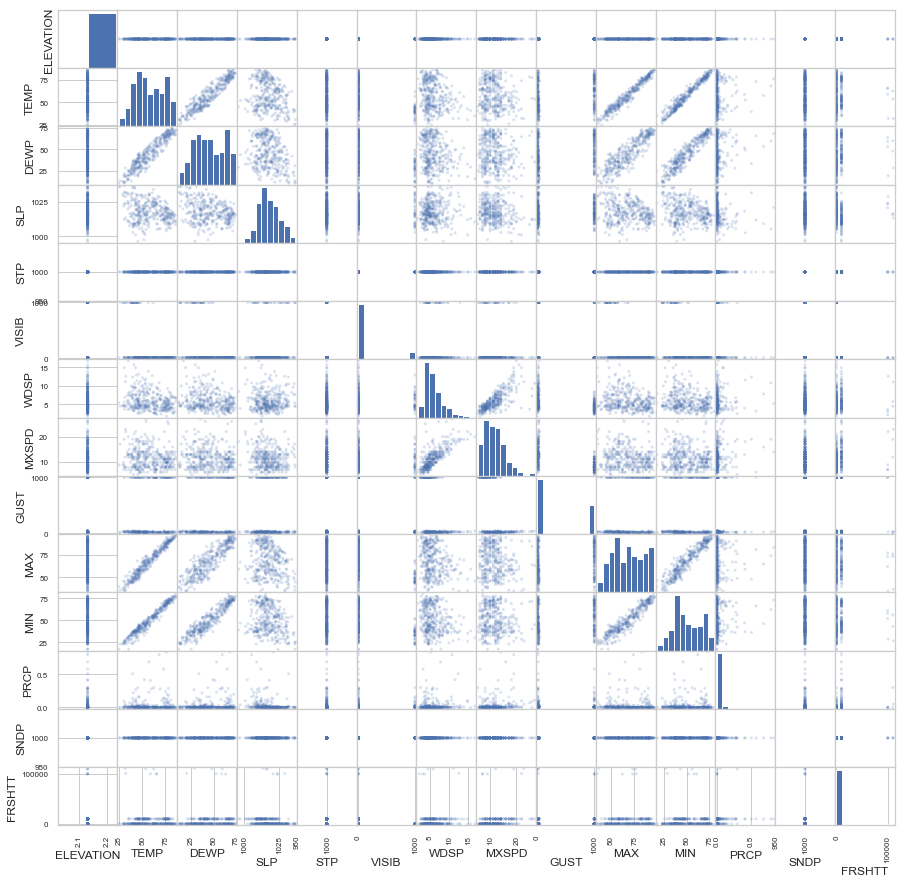

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Assuming data_clean_no_outliers is your DataFrame
scatter_matrix(data_clean_no_outliers, alpha=0.2, figsize=(15, 15), diagonal='hist')
plt.show()

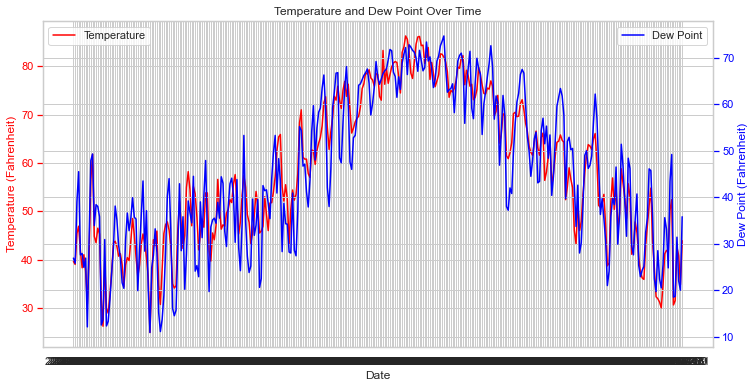

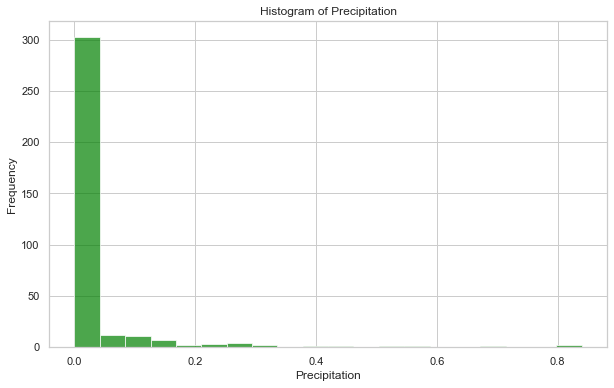

In [85]:
import matplotlib.pyplot as plt
import pandas as pd



# Create a figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Temperature on the first y-axis
ax1.plot(data_clean_no_outliers['DATE'], data_clean_no_outliers['TEMP'], label='Temperature', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (Fahrenheit)', color='red')
ax1.tick_params('y', colors='red')
ax1.legend(loc='upper left')

# Create a second y-axis for Dew Point
ax2 = ax1.twinx()
ax2.plot(data_clean_no_outliers['DATE'], data_clean_no_outliers['DEWP'], label='Dew Point', color='blue')
ax2.set_ylabel('Dew Point (Fahrenheit)', color='blue')
ax2.tick_params('y', colors='blue')
ax2.legend(loc='upper right')

plt.title('Temperature and Dew Point Over Time')
plt.show()

# Histogram of precipitation
plt.figure(figsize=(10, 6))
plt.hist(data_clean_no_outliers['PRCP'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.show()

/var/folders/p0/_mc8rm8x2pv70nwtczpdth9w0000gn/T/ipykernel_9623/1082500779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_no_outliers['DATE'] = pd.to_datetime(data_clean_no_outliers['DATE'])
/var/folders/p0/_mc8rm8x2pv70nwtczpdth9w0000gn/T/ipykernel_9623/1082500779.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_no_outliers['MONTH'] = data_clean_no_outliers['DATE'].dt.month_name()


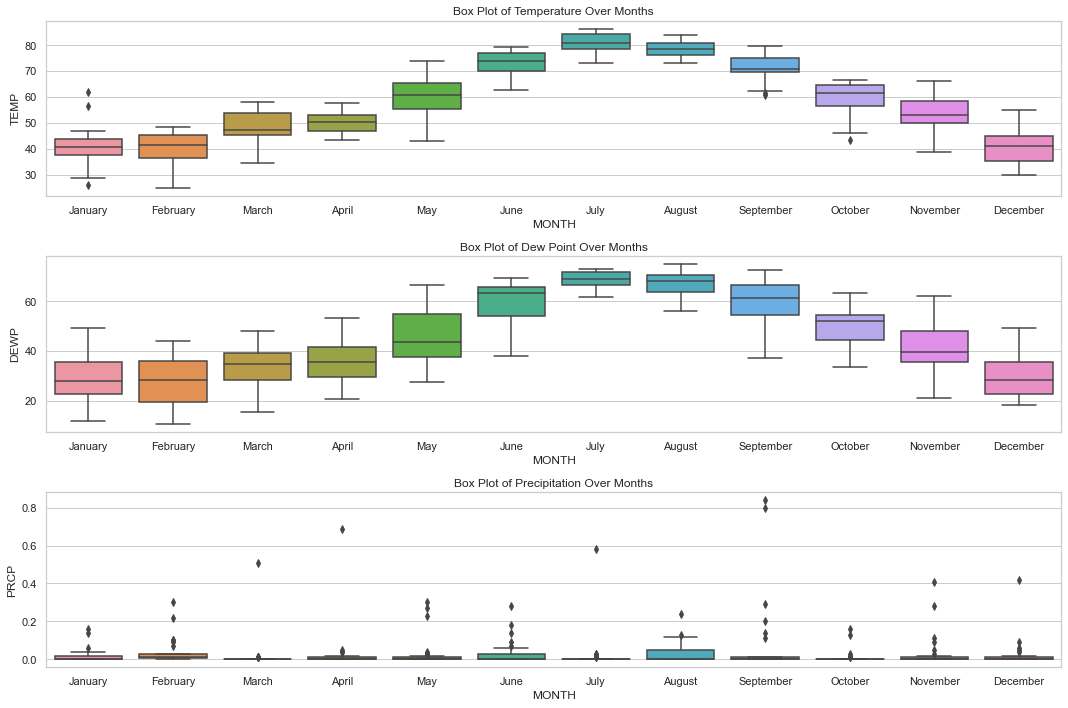

In [86]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'DATE' column to datetime format
data_clean_no_outliers['DATE'] = pd.to_datetime(data_clean_no_outliers['DATE'])

# Extract the month and create a new 'MONTH' column
data_clean_no_outliers['MONTH'] = data_clean_no_outliers['DATE'].dt.month_name()

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a box plot for temperature, dew point, and precipitation with months on the x-axis
plt.figure(figsize=(15, 10))

# Box plot for temperature
plt.subplot(3, 1, 1)
sns.boxplot(x='MONTH', y='TEMP', data=data_clean_no_outliers)
plt.title('Box Plot of Temperature Over Months')

# Box plot for dew point
plt.subplot(3, 1, 2)
sns.boxplot(x='MONTH', y='DEWP', data=data_clean_no_outliers)
plt.title('Box Plot of Dew Point Over Months')

# Box plot for precipitation
plt.subplot(3, 1, 3)
sns.boxplot(x='MONTH', y='PRCP', data=data_clean_no_outliers)
plt.title('Box Plot of Precipitation Over Months')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

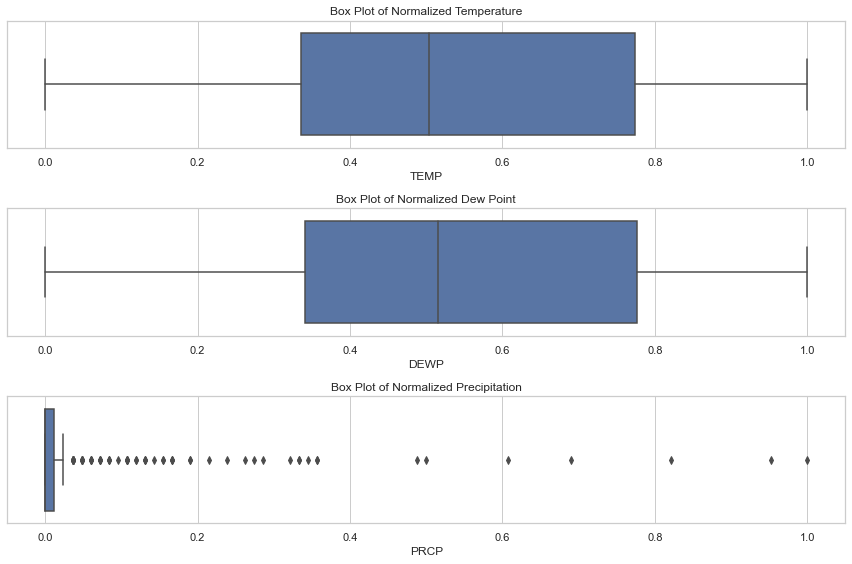

In [88]:
import seaborn as sns

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a box plot for temperature, dew point, and precipitation
plt.figure(figsize=(12, 8))

# Box plot for normalized temperature
plt.subplot(3, 1, 1)
sns.boxplot(x='TEMP', data=data_normalized)
plt.title('Box Plot of Normalized Temperature')

# Box plot for normalized dew point
plt.subplot(3, 1, 2)
sns.boxplot(x='DEWP', data=data_normalized)
plt.title('Box Plot of Normalized Dew Point')

# Box plot for normalized precipitation
plt.subplot(3, 1, 3)
sns.boxplot(x='PRCP', data=data_normalized)
plt.title('Box Plot of Normalized Precipitation')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

/var/folders/p0/_mc8rm8x2pv70nwtczpdth9w0000gn/T/ipykernel_9623/3218702416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_no_outliers['DATE'] = pd.to_datetime(data_clean_no_outliers['DATE'])
/var/folders/p0/_mc8rm8x2pv70nwtczpdth9w0000gn/T/ipykernel_9623/3218702416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_no_outliers['MONTH'] = data_clean_no_outliers['DATE'].dt.month_name()


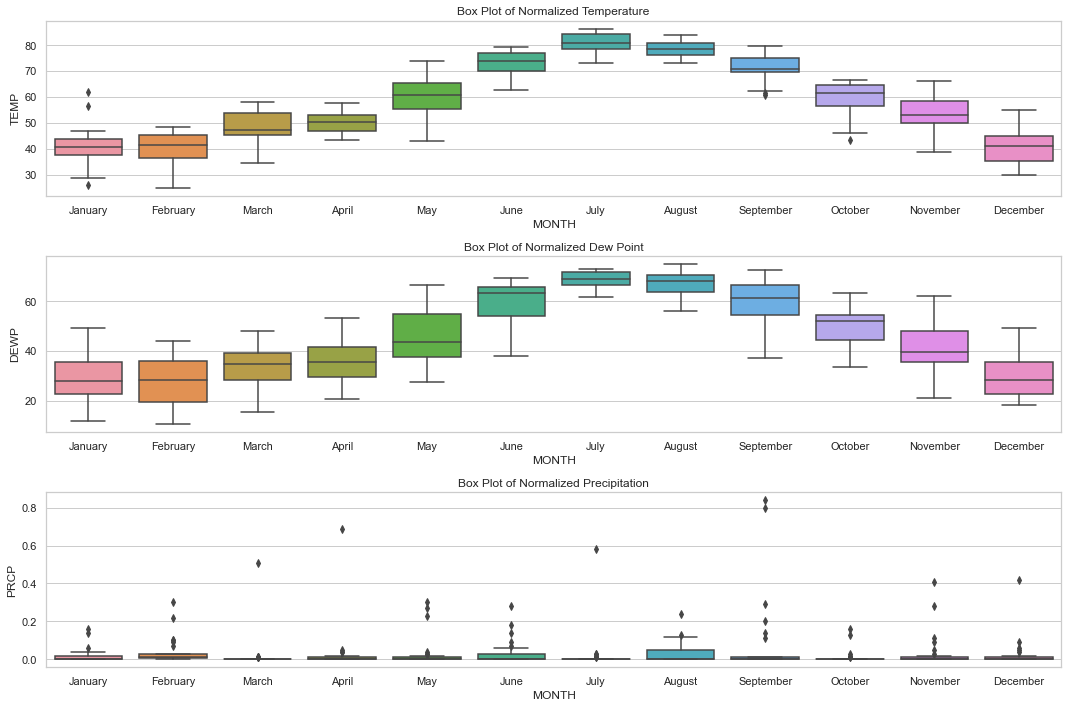

In [89]:
# Convert the 'DATE' column to datetime format
data_clean_no_outliers['DATE'] = pd.to_datetime(data_clean_no_outliers['DATE'])

# Extract the month and create a new 'MONTH' column
data_clean_no_outliers['MONTH'] = data_clean_no_outliers['DATE'].dt.month_name()

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a box plot for temperature, dew point, and precipitation with months on the x-axis
plt.figure(figsize=(15, 10))

# Box plot for normalized temperature
plt.subplot(3, 1, 1)
sns.boxplot(x='MONTH', y='TEMP', data=data_clean_no_outliers)
plt.title('Box Plot of Normalized Temperature')

# Box plot for normalized dew point
plt.subplot(3, 1, 2)
sns.boxplot(x='MONTH', y='DEWP', data=data_clean_no_outliers)
plt.title('Box Plot of Normalized Dew Point')

# Box plot for normalized precipitation
plt.subplot(3, 1, 3)
sns.boxplot(x='MONTH', y='PRCP', data=data_clean_no_outliers)
plt.title('Box Plot of Normalized Precipitation')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

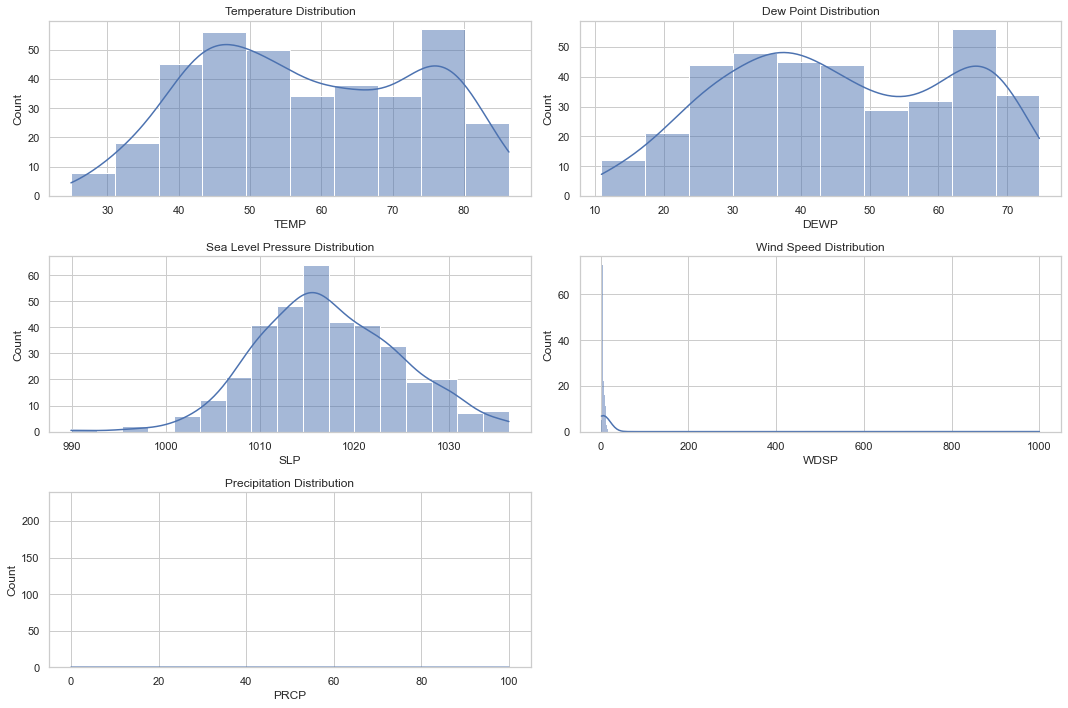

In [90]:
data_stats = data_clean_no_outliers.describe()

# Plot histograms for key variables
plt.figure(figsize=(15, 10))

# Histogram for temperature
plt.subplot(3, 2, 1)
sns.histplot(data_clean['TEMP'], kde=True)
plt.title('Temperature Distribution')

# Histogram for dew point
plt.subplot(3, 2, 2)
sns.histplot(data_clean['DEWP'], kde=True)
plt.title('Dew Point Distribution')

# Histogram for sea level pressure
plt.subplot(3, 2, 3)
sns.histplot(data_clean['SLP'], kde=True)
plt.title('Sea Level Pressure Distribution')

# Histogram for wind speed
plt.subplot(3, 2, 4)
sns.histplot(data_clean['WDSP'], kde=True)
plt.title('Wind Speed Distribution')

# Histogram for precipitation
plt.subplot(3, 2, 5)
sns.histplot(data_clean['PRCP'], kde=True)
plt.title('Precipitation Distribution')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

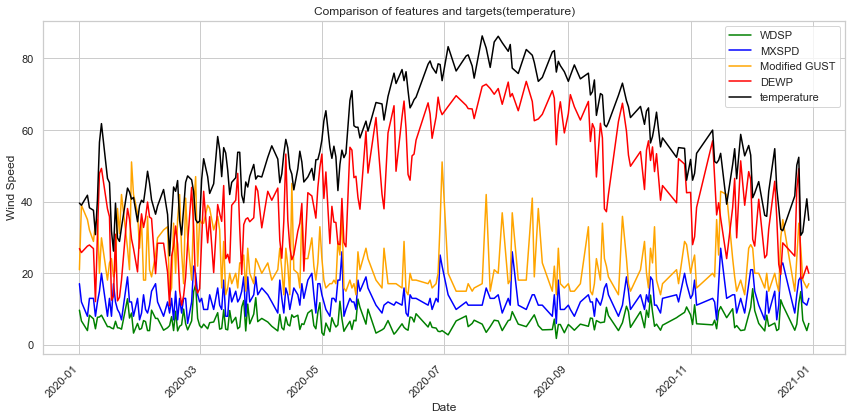

In [182]:
import matplotlib.pyplot as plt

# Filter out rows with abnormal values in GUST column
data_clean_no_abnormal_gust = data_clean_no_outliers[data_clean_no_outliers['GUST'] < 999.9]

# Plotting WDSP, MXSPD, and modified GUST
plt.figure(figsize=(12, 6))

plt.plot(data_clean_no_abnormal_gust['DATE'], data_clean_no_abnormal_gust['WDSP'], label='WDSP', color='green')
plt.plot(data_clean_no_abnormal_gust['DATE'], data_clean_no_abnormal_gust['MXSPD'], label='MXSPD', color='blue')
plt.plot(data_clean_no_abnormal_gust['DATE'], data_clean_no_abnormal_gust['GUST'], label='Modified GUST', color='orange')
plt.plot(data_clean_no_abnormal_gust['DATE'], data_clean_no_abnormal_gust['DEWP'], label='DEWP', color='red')
plt.plot(data_clean_no_abnormal_gust['DATE'], data_clean_no_abnormal_gust['TEMP'], label='temperature', color='black')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.title('Comparison of features and targets(temperature)')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

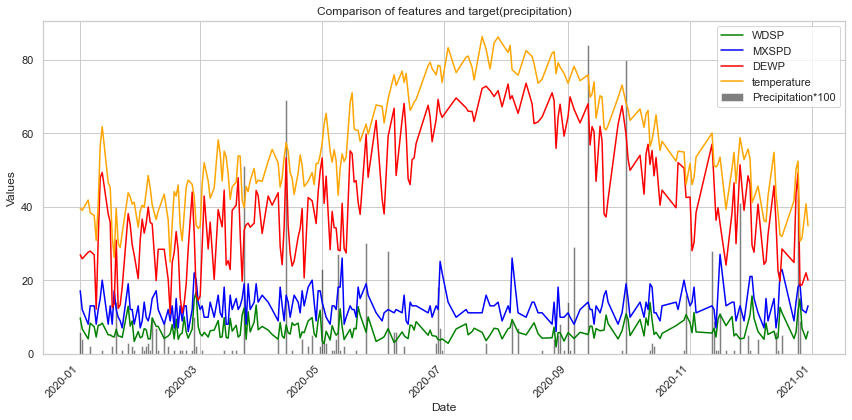

In [183]:

import matplotlib.pyplot as plt

# Filter out rows with abnormal values in GUST column
data_clean_no_abnormal_gust = data_clean_no_outliers[data_clean_no_outliers['GUST'] < 999.9]

# Plotting WDSP, MXSPD, modified GUST, and precipitation
plt.figure(figsize=(12, 6))

plt.plot(data_clean_no_abnormal_gust['DATE'], data_clean_no_abnormal_gust['WDSP'], label='WDSP', color='green')
plt.plot(data_clean_no_abnormal_gust['DATE'], data_clean_no_abnormal_gust['MXSPD'], label='MXSPD', color='blue')
plt.plot(data_clean_no_abnormal_gust['DATE'], data_clean_no_abnormal_gust['DEWP'], label='DEWP', color='red')
plt.plot(data_clean_no_abnormal_gust['DATE'], data_clean_no_abnormal_gust['TEMP'], label='temperature', color='orange')
plt.bar(data_clean_no_abnormal_gust['DATE'], data_clean_no_abnormal_gust['PRCP']*100, label='Precipitation*100', color='black', alpha=0.5)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Comparison of features and target(precipitation)')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

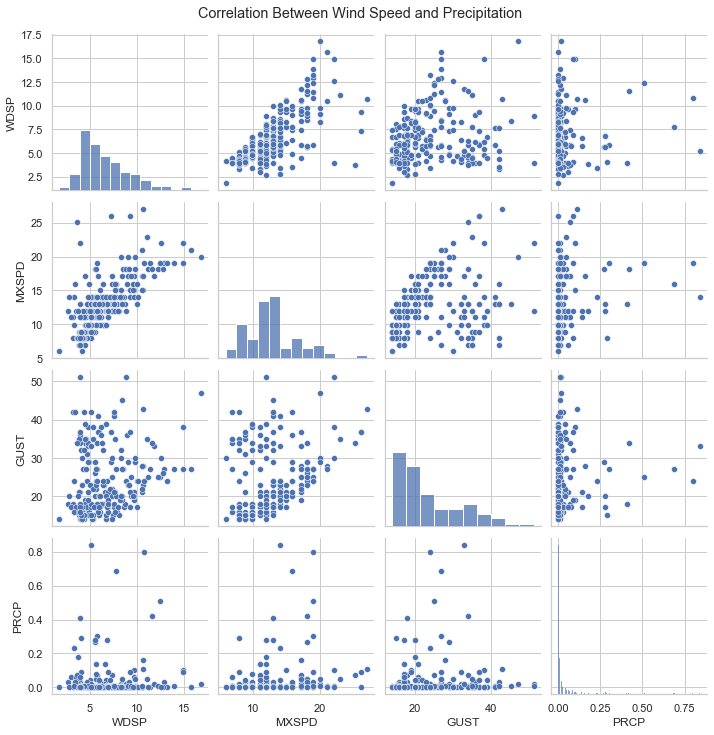

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
wind_precip_data = data_clean_no_abnormal_gust[['WDSP', 'MXSPD', 'GUST', 'PRCP']]

# Create a pairplot
sns.pairplot(wind_precip_data)
plt.suptitle('Correlation Between Wind Speed and Precipitation', y=1.02)
plt.show()

In [93]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


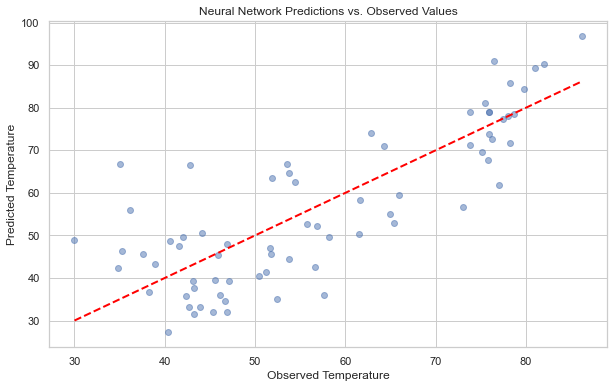

In [44]:
import matplotlib.pyplot as plt

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Observed Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Neural Network Predictions vs. Observed Values')
plt.show()

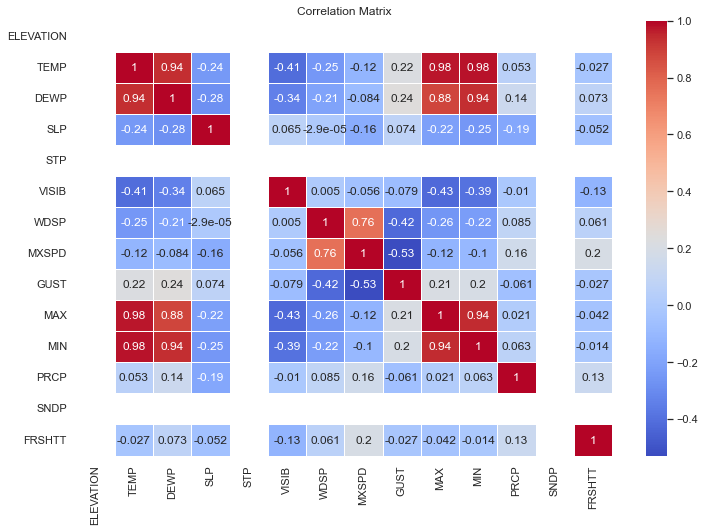

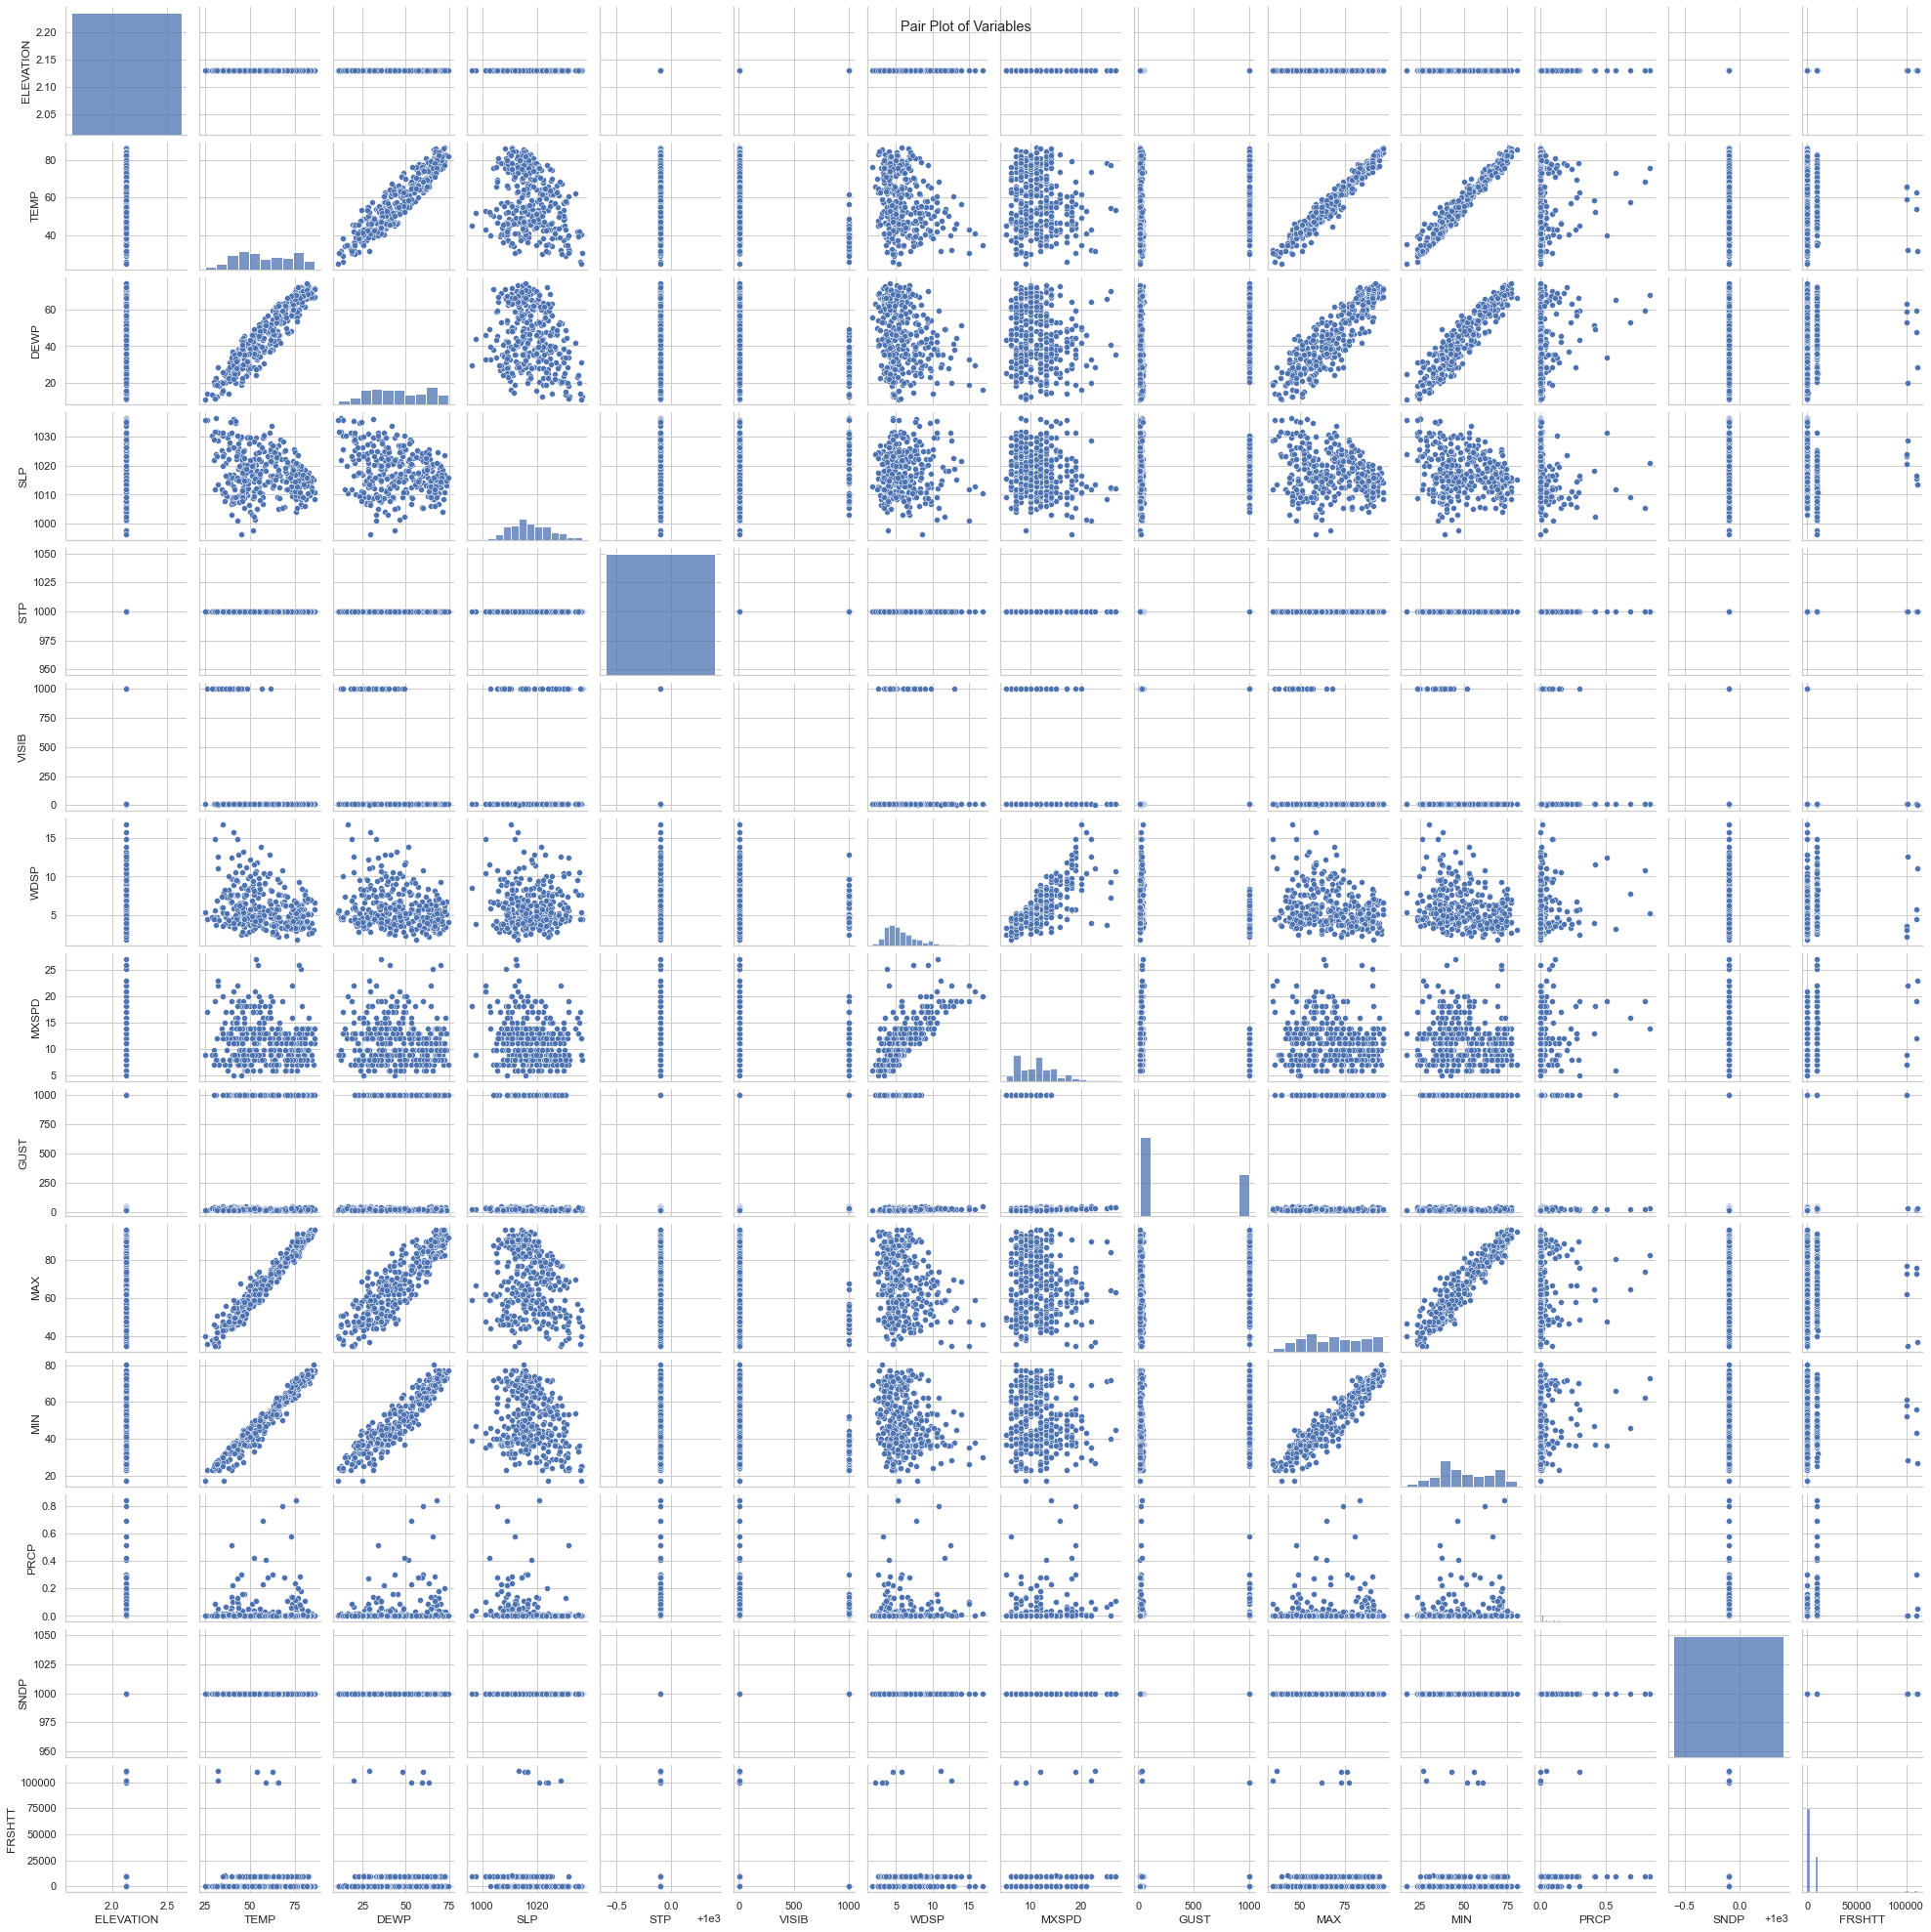

ValueError: could not convert string to float: 'March'

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Load and preprocess the data
# Assuming 'data_clean_no_outliers' contains the preprocessed DataFrame

# 1. Correlation Analysis
correlation_matrix = data_clean_no_outliers.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 2. Pair Plots
sns.pairplot(data_clean_no_outliers, height=2)
plt.suptitle('Pair Plot of Variables')
plt.show()

# 3. Feature Importance
X = data_clean_no_outliers.drop(['DATE', 'TEMP'], axis=1)
y = data_clean_no_outliers['TEMP']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Training and Evaluation
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 5. Visualize Predicted vs. Actual Values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Random Forest Predictions vs. Actual Values')
plt.show()

In [170]:
import pandas as pd

# Selecting relevant columns for temperature and precipitation
selected_columns = ['TEMP', 'PRCP', 'DEWP', 'SLP', 'VISIB', 'WDSP', 'MXSPD', 'GUST', 'MAX', 'MIN', 'SNDP', 'FRSHTT']
selected_data = data_clean_no_outliers[selected_columns]

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Select the correlations with the target variables (TEMP and PRCP)
temperature_correlations = correlation_matrix['TEMP']
precipitation_correlations = correlation_matrix['PRCP']

# Display correlations with temperature
print("\nCorrelations with Temperature:")
print(temperature_correlations)

# Display correlations with precipitation
print("\nCorrelations with Precipitation:")
print(precipitation_correlations)

Correlation Matrix:
            TEMP      PRCP      DEWP       SLP     VISIB      WDSP     MXSPD  \
TEMP    1.000000  0.053249  0.937204 -0.242386 -0.413850 -0.249490 -0.121301   
PRCP    0.053249  1.000000  0.139086 -0.187582 -0.010180  0.085180  0.159102   
DEWP    0.937204  0.139086  1.000000 -0.280619 -0.341335 -0.205121 -0.083572   
SLP    -0.242386 -0.187582 -0.280619  1.000000  0.065375 -0.000029 -0.159974   
VISIB  -0.413850 -0.010180 -0.341335  0.065375  1.000000  0.004981 -0.055766   
WDSP   -0.249490  0.085180 -0.205121 -0.000029  0.004981  1.000000  0.756740   
MXSPD  -0.121301  0.159102 -0.083572 -0.159974 -0.055766  0.756740  1.000000   
GUST    0.222681 -0.060911  0.244466  0.073568 -0.079285 -0.421545 -0.528622   
MAX     0.975224  0.020627  0.883613 -0.215698 -0.425294 -0.255110 -0.124256   
MIN     0.976354  0.062906  0.936308 -0.248374 -0.391641 -0.224308 -0.101345   
SNDP         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
FRSHTT -0.027091  0.

In [171]:
# Selecting relevant columns for temperature and precipitation
selected_columns = ['TEMP', 'PRCP', 'DEWP', 'SLP', 'VISIB', 'WDSP', 'MXSPD', 'GUST', 'MAX', 'MIN', 'SNDP', 'FRSHTT']
selected_data = data_clean_no_outliers[selected_columns]

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Select the correlations with the target variables (TEMP and PRCP)
temperature_correlations = correlation_matrix['TEMP']
precipitation_correlations = correlation_matrix['PRCP']

# Select variables with positive correlation with temperature
positive_temperature_correlations = temperature_correlations[temperature_correlations > 0]

# Select variables with positive correlation with precipitation
positive_precipitation_correlations = precipitation_correlations[precipitation_correlations > 0]

# Display selected variables
print("\nVariables with Positive Correlation with Temperature:")
print(positive_temperature_correlations)

print("\nVariables with Positive Correlation with Precipitation:")
print(positive_precipitation_correlations)


Variables with Positive Correlation with Temperature:
TEMP    1.000000
PRCP    0.053249
DEWP    0.937204
GUST    0.222681
MAX     0.975224
MIN     0.976354
Name: TEMP, dtype: float64

Variables with Positive Correlation with Precipitation:
TEMP      0.053249
PRCP      1.000000
DEWP      0.139086
WDSP      0.085180
MXSPD     0.159102
MAX       0.020627
MIN       0.062906
FRSHTT    0.128270
Name: PRCP, dtype: float64


Mean Squared Error: 24.809888513105168
R-squared: 0.8895899548713961


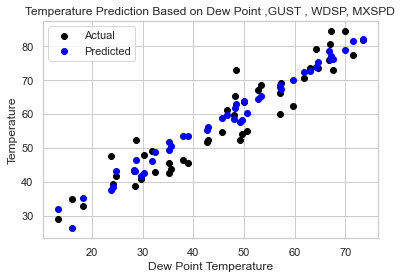

In [185]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = data_clean_no_abnormal_gust[['DEWP', 'GUST','WDSP','MXSPD']]
# Target: TEMP (Temperature)
y = data_clean_no_abnormal_gust['TEMP']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualizing the predictions
plt.scatter(X_test['DEWP'], y_test, color='black', label='Actual')
plt.scatter(X_test['DEWP'], y_pred, color='blue', label='Predicted')
plt.xlabel('Dew Point Temperature')
plt.ylabel('Temperature')
plt.title('Temperature Prediction Based on Dew Point ,GUST , WDSP, MXSPD')
plt.legend()
plt.show()

In [193]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Features: DEWP (Dew Point), GUST (Wind Gust Speed)
X = data_clean_no_abnormal_gust[['DEWP', 'GUST','WDSP','MXSPD']]
# Target: TEMP (Temperature)
y = data_clean_no_abnormal_gust['TEMP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the neural network model
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 23.658387991957735
R-squared: 0.8947144125826165


/Users/zhangrui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


RMSE for MLPRegressor: 5.34270582046578



/Users/zhangrui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


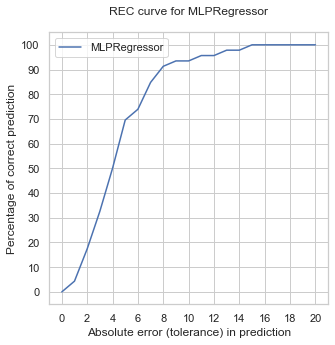

In [198]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'PRCP' is the target variable
X = data_clean_no_abnormal_gust[['DEWP', 'GUST','WDSP','MXSPD']]
# Target: TEMP (Temperature)
y = data_clean_no_abnormal_gust['TEMP']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLPRegressor in a pipeline with preprocessing
mlp_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000))  # Adjust hidden_layer_sizes as needed
])

# Fit the pipeline
mlp_pipe.fit(X_train, y_train.ravel())
y_pred_mlp = mlp_pipe.predict(X_test)

# Calculate RMSE for MLPRegressor
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print("RMSE for MLPRegressor:", rmse_mlp)
print()

# REC curve for MLPRegressor
tol_max = 20
rec_mlp = [np.sum(np.abs(y_pred_mlp - y_test) <= i) / len(y_test) * 100 for i in range(tol_max + 1)]

# Plot REC curve
plt.figure(figsize=(5, 5))
plt.title("REC curve for MLPRegressor\n")
plt.xlabel("Absolute error (tolerance) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i * 2 for i in range(tol_max + 1)])
plt.yticks([i * 10 for i in range(11)])
plt.grid(True)
plt.plot(range(tol_max + 1), rec_mlp, label='MLPRegressor')
plt.legend()
plt.show()

In [178]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assume X contains wind features and y contains precipitation
X = data_clean_no_abnormal_gust[['WDSP', 'MXSPD', 'TEMP','DEWP']]
y = data_clean_no_abnormal_gust['PRCP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the neural network model
model = MLPRegressor(hidden_layer_sizes=(85, 85), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print(f'R-squared: {r2}')

Mean Squared Error: 0.0068503074142094444
R-squared: 0.1744925458752572


In [159]:
print(X_train.columns)

Index(['WDSP', 'MXSPD', 'TEMP', 'DEWP'], dtype='object')


Mean Squared Error: 0.007023417868875553
R-squared: 0.15363158853816405


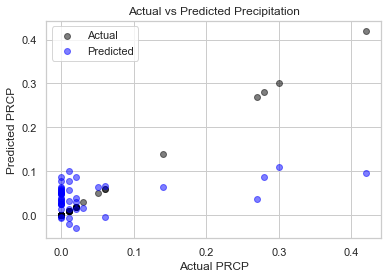

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


X = data_clean_no_abnormal_gust[['WDSP', 'MXSPD', 'TEMP','DEWP']]
y = data_clean_no_abnormal_gust['PRCP']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualizing the predictions
plt.scatter(y_test, y_test, color='black', label='Actual', alpha=0.5)
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.5)
plt.xlabel('Actual PRCP')
plt.ylabel('Predicted PRCP')
plt.title('Actual vs Predicted Precipitation')
plt.legend()
plt.show()

RMSE for MLPRegressor: 0.0910249165814621



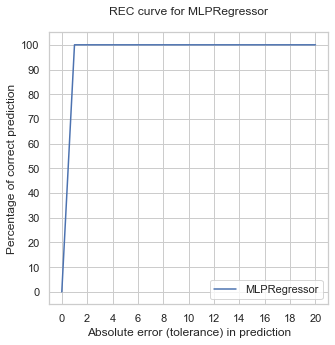

In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'PRCP' is the target variable
X = data_clean_no_abnormal_gust[['WDSP', 'MXSPD', 'TEMP','DEWP']]
y = data_clean_no_abnormal_gust['PRCP']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLPRegressor in a pipeline with preprocessing
mlp_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(80, 80), max_iter=1000))  # Adjust hidden_layer_sizes as needed
])

# Fit the pipeline
mlp_pipe.fit(X_train, y_train.ravel())
y_pred_mlp = mlp_pipe.predict(X_test)

# Calculate RMSE for MLPRegressor
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print("RMSE for MLPRegressor:", rmse_mlp)
print()

# REC curve for MLPRegressor
tol_max = 20
rec_mlp = [np.sum(np.abs(y_pred_mlp - y_test) <= i) / len(y_test) * 100 for i in range(tol_max + 1)]

# Plot REC curve
plt.figure(figsize=(5, 5))
plt.title("REC curve for MLPRegressor\n")
plt.xlabel("Absolute error (tolerance) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i * 2 for i in range(tol_max + 1)])
plt.yticks([i * 10 for i in range(11)])
plt.grid(True)
plt.plot(range(tol_max + 1), rec_mlp, label='MLPRegressor')
plt.legend()
plt.show()